<a href="https://colab.research.google.com/github/visionNoob/Tensorflow_Tutorial/blob/master/Day_2/05%20-%20XOR%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

'1.14.0'

# XOR Problem

* XOR 로 표시되는 정보를 구분해보자

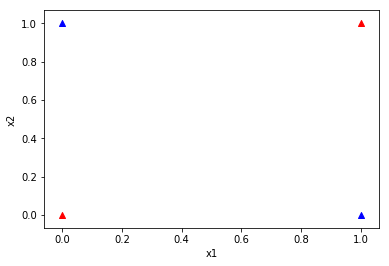

In [0]:
x_data = [[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]]
y_data = [[0.],
          [1.],
          [1.],
          [0.]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Dataset 준비



In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

# Multi-layer perceptron

In [0]:
W1 = tf.Variable(tf.random_normal([2, 1]), name='weight1')
b1 = tf.Variable(tf.random_normal([1]), name='bias1')

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')

W3 = tf.Variable(tf.random_normal([2, 1]), name='weight3')
b3 = tf.Variable(tf.random_normal([1]), name='bias3')

## Layers 구성

In [0]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    
    return hypothesis

## Loss Function

In [0]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [0]:
def grad(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

## Training


In [0]:
EPOCHS = 100

for step in range(EPOCHS):
    for features, labels  in dataset:
        grads = grad(neural_net(features), labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 10 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))


Iter: 0, Loss: 0.6925
Iter: 10, Loss: 0.6924
Iter: 20, Loss: 0.6923
Iter: 30, Loss: 0.6922
Iter: 40, Loss: 0.6921
Iter: 50, Loss: 0.6920
Iter: 60, Loss: 0.6919
Iter: 70, Loss: 0.6919
Iter: 80, Loss: 0.6918
Iter: 90, Loss: 0.6917


In [0]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [0]:
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 0.5000
